In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv("../../merged_cleaned_data/deaths_merged_data.csv")
df.head()

,Unnamed: 0,FIPS,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths
0,0,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99
1,1,1009,644.830460,57645,24222,20600,8220,909,22656,7861,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131
2,2,1013,776.838201,20025,10026,6708,4640,567,20430,2141,...,78.563680,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66
3,3,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,...,79.439032,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305
4,4,1017,596.560643,33826,16981,13516,5531,773,22827,4383,...,76.995358,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117


In [3]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop('FIPS', axis=1)

In [4]:
#rename target column
# df = df.rename(columns={'3/31/21':'first_year_deaths'})

In [5]:
#create variable for case% for each counties population
df['death_pct'] = df['first_year_deaths']/df['E_TOTPOP']*100
df['death_pct'].head()

FIPS
1001    0.179348
1009    0.227253
1013    0.329588
1015    0.264992
1017    0.345888
Name: death_pct, dtype: float64

In [6]:
df['death_pct'].describe()

count    3058.000000
mean        0.187585
std         0.108421
min         0.000000
25%         0.112688
50%         0.173362
75%         0.242428
max         0.788566
Name: death_pct, dtype: float64

In [7]:
df

,Unnamed: 0,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,...,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths,death_pct
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,0,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,...,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99,0.179348
1009,1,644.830460,57645,24222,20600,8220,909,22656,7861,10233,...,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131,0.227253
1013,2,776.838201,20025,10026,6708,4640,567,20430,2141,3806,...,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66,0.329588
1015,3,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,...,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305,0.264992
1017,4,596.560643,33826,16981,13516,5531,773,22827,4383,6409,...,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117,0.345888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131,3053,1793.476183,11355,5592,3511,2751,482,17864,2386,2025,...,78.895880,76.629575,60.576045,73.670302,64.571017,68.007770,50.959826,0.0,39,0.343461
48505,3054,998.411980,14369,6388,4405,5609,621,17228,3226,1999,...,79.572483,74.378252,77.443239,76.386871,74.001471,73.609838,47.134744,0.0,30,0.208783
48507,3055,1297.406535,12131,4344,3509,4150,421,13350,2719,1665,...,76.024682,75.848196,76.967659,77.303576,70.010162,71.121990,65.403060,0.0,40,0.329734


## RF Regressor

In [8]:
df.shape

(3058, 106)

In [9]:
# Define feature set (x)
X = df.drop(['first_year_deaths', 'death_pct'], axis=1).values

#Define (y)
y= df['death_pct'].values

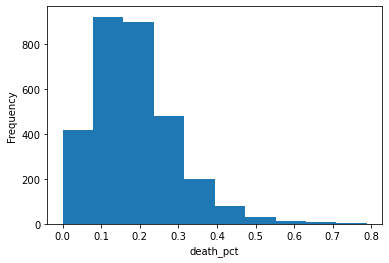

In [10]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(df["death_pct"])
plt.xlabel("death_pct")
plt.ylabel("Frequency")
plt.show()

In [11]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 78) 

In [12]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2140, 104)
(918, 104)
(2140,)
(918,)


In [13]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [15]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150, 355, 561, 766, 972, 1177, 1383, 1588, 1794, 2000]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
#view best parameters 
rf_random.best_params_

In [ ]:
# to ignore division errors for zeros
np.seterr(invalid='ignore')

In [ ]:
#check zeros in y_test
zeros = np.where(y_test ==0)
print(zeros)

In [ ]:
#check for zeros
n_zeros= zeros[0].size
print (n_zeros)

In [ ]:
# evaluate random search 


def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / len(y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

In [ ]:
# evaluate performance with best_random estimator
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, y_test)

In [ ]:
# print the improvement 
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
